# ☃️ [Day 6](https://adventofcode.com/2019/day/6)

In [1]:
from collections import defaultdict

def parse_links(links, find_orbit_src=[], forward=True):
    # Find the root
    src, dst = zip(*[x.split(')') for x in links])
    root = list(set(src) - set(dst))
    assert len(root) == 1
    root = root[0]    
    
    if len(find_orbit_src):
        find_orbit_src = [src[dst.index(x)] for x in find_orbit_src]
        
    # Index
    links = defaultdict(lambda: [])
    if not forward:
        src, dst = dst, src
    for x, y in zip(src, dst):
        links[x].append(y)
    return root, links, find_orbit_src


def get_number_of_orbits(links):
    root, links, _ = parse_links(links)
    def build_tree(node, num_orbits=0):
        return num_orbits + sum(build_tree(child, num_orbits + 1) for child in links[node])
    return build_tree(root)


def get_orbital_transfer(links, src="YOU", tgt="SAN"):
    root, links, find_orbit_src = parse_links(links, [src, tgt], forward=False)
    
    def get_ancestors(node, store={}, steps=0):
        for parent in links[node]:
            store[parent] = steps + 1
            get_ancestors(parent, store, steps + 1)
            
    src_path = {}
    get_ancestors(find_orbit_src[0], src_path)
    dst_path = defaultdict(lambda: float('inf'))
    get_ancestors(find_orbit_src[1], dst_path)
    
    return min(src_path[key] + dst_path[key] for key in src_path)

In [2]:
with open("inputs/day6.txt", 'r') as f:
    inputs = f.read().splitlines()
    
print("Number or orbits:", get_number_of_orbits(inputs))
print("Length of orbital transfer:", get_orbital_transfer(inputs))

Number or orbits: 162439
Length of orbital transfer: 367


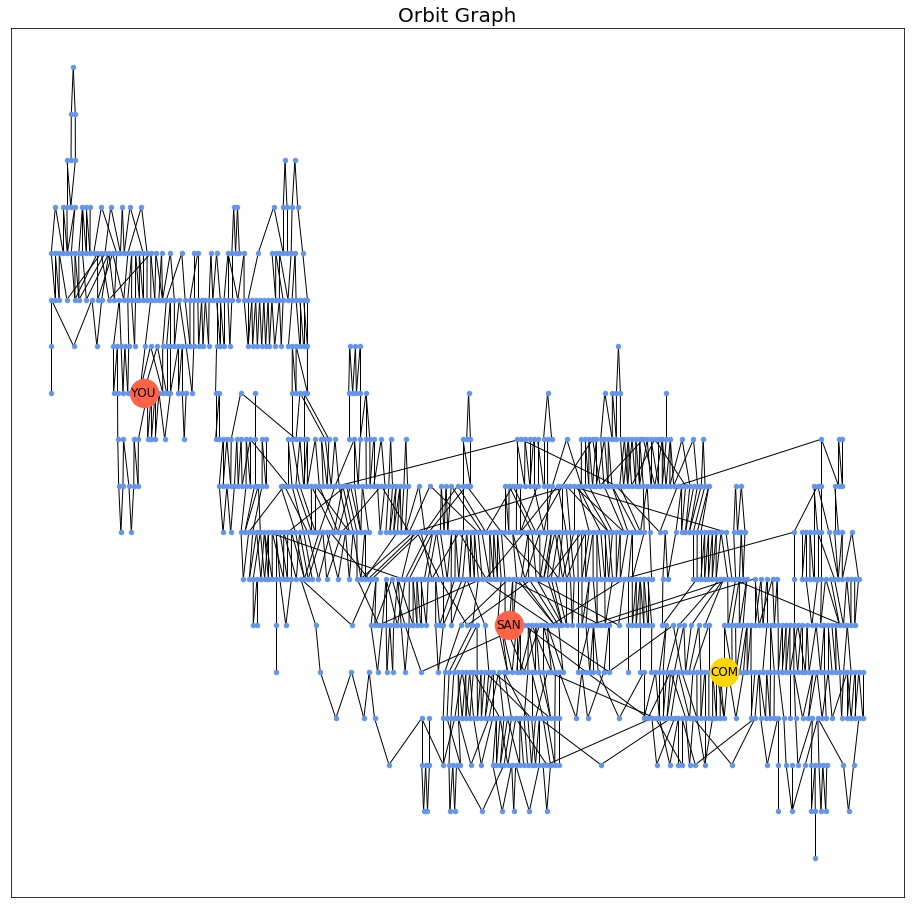

In [4]:
import networkx as nx
from matplotlib import pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

def plot_orbits(links, nodes_size=700, font_size=12):
    root, links, find_orbit_src = parse_links(links)
    G = nx.Graph()
    G.add_edges_from([(src, x) for src in links for x in links[src]])
    plt.figure(figsize=(16, 16))
    pos = graphviz_layout(G, prog='dot')
    labels = {k: k if k in ["COM", "SAN", "YOU"] else "" for k in G.nodes()}
    nx.draw_networkx(G, 
            pos=pos,
            node_size=20, 
            nodelist=G.nodes,
            labels=labels,
            font_color='black',
            node_color="CornFLowerBlue")
    nx.draw_networkx_nodes(G, 
                           pos=pos,
                           font_size=15,
                           nodelist=['COM'], 
                           node_size=800, 
                           node_color="gold")
    nx.draw_networkx_nodes(G, 
                           pos=pos,
                           font_size=15,
                           nodelist=['YOU', 'SAN'], 
                           node_size=800, 
                           node_color="tomato")
    plt.title("Orbit Graph", fontsize=20)
    
plot_orbits(inputs)
plt.show()